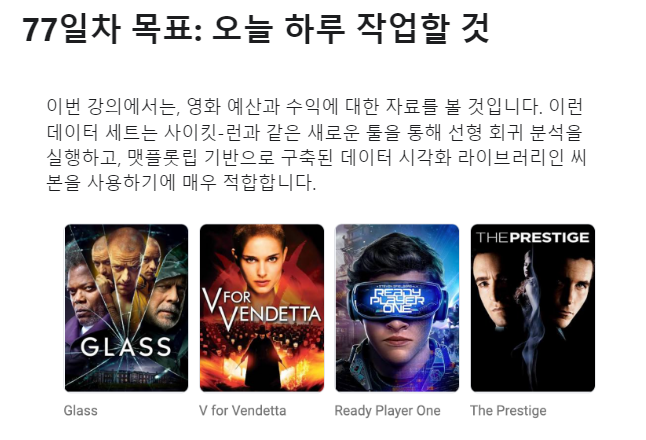
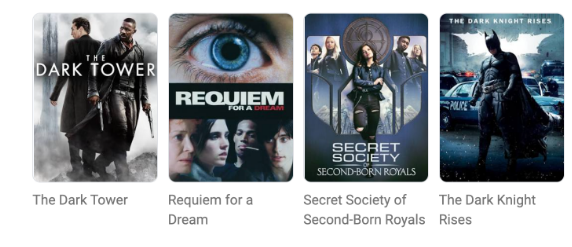

## `646강`
핵심 학습내용 및 요약

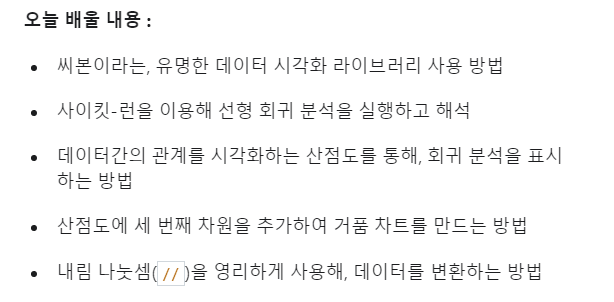

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir('data/')

['cost_revenue_dirty.csv']

## `647강`
데이터 탐색 및 정리하기

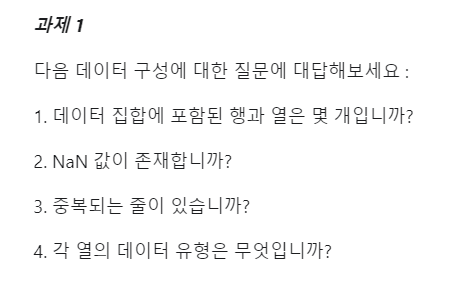

In [4]:
data = pd.read_csv('data/cost_revenue_dirty.csv')
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [5]:
data.shape

(5391, 6)

In [6]:
data.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [17]:
data.drop_duplicates(inplace=True)
data.shape

(5391, 6)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


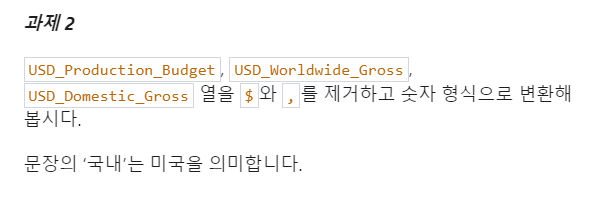

In [20]:
data['USD_Production_Budget'].value_counts()

$20,000,000     216
$10,000,000     188
$15,000,000     164
$40,000,000     160
$30,000,000     159
               ... 
$3,716,946        1
$139,000,000      1
$9,300,000        1
$17,900,000       1
$207,000,000      1
Name: USD_Production_Budget, Length: 484, dtype: int64

In [27]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$','')
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(',','')
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])

In [28]:
data['USD_Production_Budget'].value_counts()

20000000     216
10000000     188
15000000     164
40000000     160
30000000     159
            ... 
15250000       1
16400000       1
103000         1
306000000      1
4638783        1
Name: USD_Production_Budget, Length: 484, dtype: int64

In [21]:
data['USD_Worldwide_Gross'].value_counts()

$0              357
$8,000,000        9
$7,000,000        6
$2,000,000        6
$11,000,000       5
               ... 
$68,838,736       1
$160,247,805      1
$160,558,438      1
$10,618,813       1
$16,640,210       1
Name: USD_Worldwide_Gross, Length: 4969, dtype: int64

In [30]:
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$','')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(',','')
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])

In [31]:
data['USD_Worldwide_Gross'].value_counts()

0            357
8000000        9
7000000        6
2000000        6
11000000       5
            ... 
92618117       1
123888320      1
834953         1
11642254       1
498438212      1
Name: USD_Worldwide_Gross, Length: 4969, dtype: int64

In [22]:
data['USD_Domestic_Gross'].value_counts()

$0              512
$8,000,000        9
$2,000,000        7
$7,000,000        7
$10,000,000       6
               ... 
$6,469,813        1
$52,330,111       1
$176,387,405      1
$53,715,611       1
$16,640,210       1
Name: USD_Domestic_Gross, Length: 4809, dtype: int64

In [32]:
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$','')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(',','')
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

In [33]:
data['USD_Domestic_Gross'].value_counts()

0            512
8000000        9
7000000        7
2000000        7
10000000       6
            ... 
130444603      1
49823037       1
130178411      1
7578946        1
18653615       1
Name: USD_Domestic_Gross, Length: 4809, dtype: int64

----
풀이

In [38]:
chars_remove = [',', '$']
col_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in col_to_clean:
    for char in chars_remove:
        data[col] = data[col].astype(str).str.replace(char,'')
        
    data[col] =pd.to_numeric(data[col])
 

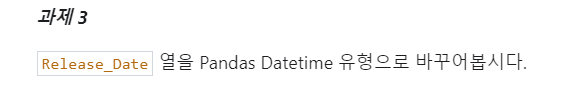

In [35]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Release_Date'].head(3)

0   1915-08-02
1   1916-05-09
2   1916-12-24
Name: Release_Date, dtype: datetime64[ns]

## `648강`
수익이 '0'인 영화 조사하기

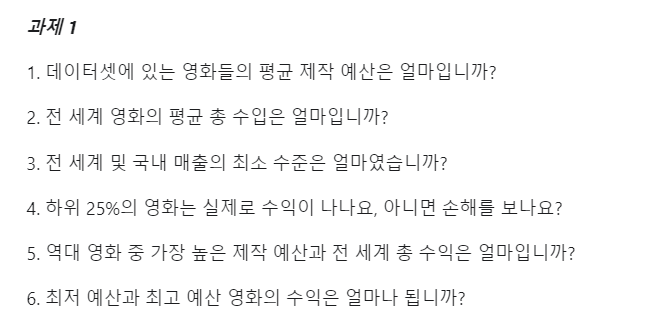

In [75]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


    - 평균적인 영화 제작비는 약 3,100만 달로, 전 세계 수익의 약 3배(8,900만 달러) 수입
    - 하위 4분기에 있는 모든 영화들은 평균 영화비용은 5백달러이지만, 전 세계적으로 380만 달러의 수입을 올려 손해를 봄
    - 국내 및 전 세계 최소 수익은 $0 -> 영화가 상영되지 않거나 취소됐을 경우
    - 최고 생산 예산은 4억 2500만 달러, 가장 높은 수익은 27억 달러

In [77]:
# 예산이 가장 적게 든 영화
data[data['USD_Production_Budget']==1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [80]:
# 예산이 가장 많이 들어간 영화
data[data['USD_Production_Budget']==425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


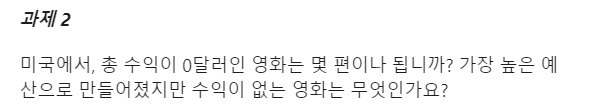

In [83]:
zero_domestic = data[data['USD_Domestic_Gross']==0]
zero_domestic.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


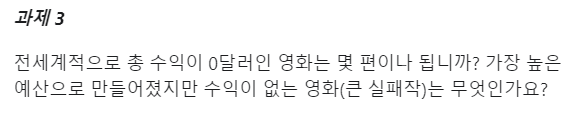

In [84]:
zero_world = data[data['USD_Worldwide_Gross']==0]
zero_world.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


## `649강`
 다중 조건으로 필터링하기: 해외 영화

In [85]:
international_releases = data.loc[(data['USD_Domestic_Gross']==0) &
                                 (data['USD_Worldwide_Gross']!=0)]

international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


*비트연산*

In [86]:
bool_list1 = [True, True, False, False]
bool_list2 = [False, True, True, False]

In [87]:
np.array(bool_list1) & np.array(bool_list2)

array([False,  True, False, False])

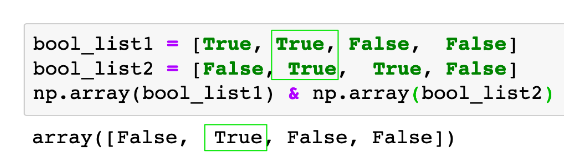

    - 국내 매출이 0이고 전 세계 매출은 0이 아닌 영화에 대해 확인
    - 비트 연산자가 우선적으로 작동하므로 우선순위 변경을 위해 괄호 포함

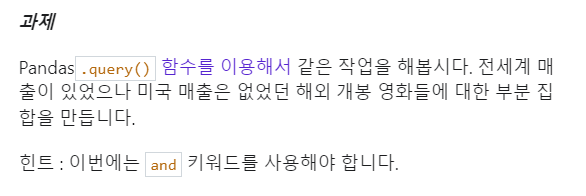

In [90]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


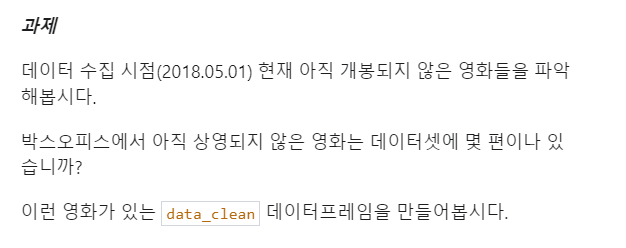

In [94]:
scrape_date = pd.Timestamp('2018-5-1')
scrape_date 

Timestamp('2018-05-01 00:00:00')

In [96]:
future_releases = data[data['Release_Date']>=scrape_date]
future_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [98]:
data_clean = data.drop(future_releases.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


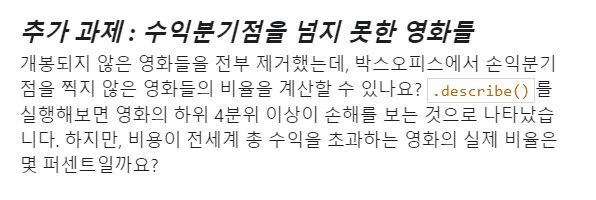

In [100]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5384.000000,5.384000e+03,5.384000e+03,5.384000e+03
mean,2698.113113,3.103848e+07,8.897095e+07,4.128913e+07
std,1555.789968,4.044004e+07,1.685368e+08,6.605551e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1351.750000,5.000000e+06,3.929036e+06,1.354765e+06
50%,2698.500000,1.700000e+07,2.753733e+07,1.722193e+07
75%,4045.250000,4.000000e+07,9.664200e+07,5.240353e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [104]:
money_losing = data_clean.loc[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
money_losing
                                         

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [105]:
len(money_losing)/len(data_clean)

0.37277117384843983

    - 37.2% 나 되는 영화가 박스오피스에서 제작 예산을 회수하지 못하고 있음

In [106]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

## `650강`
씨본 데이터 시각화하기: 거품형 그래프

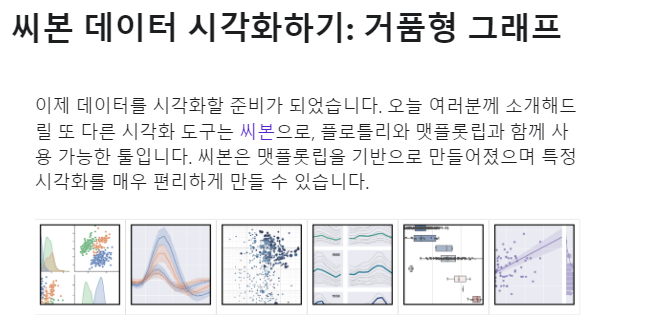

*seaborn 산점도*

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

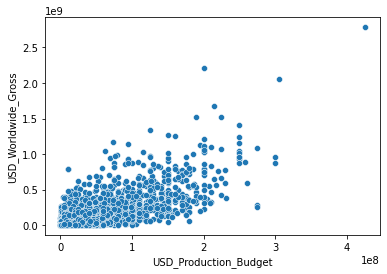

In [107]:
sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')

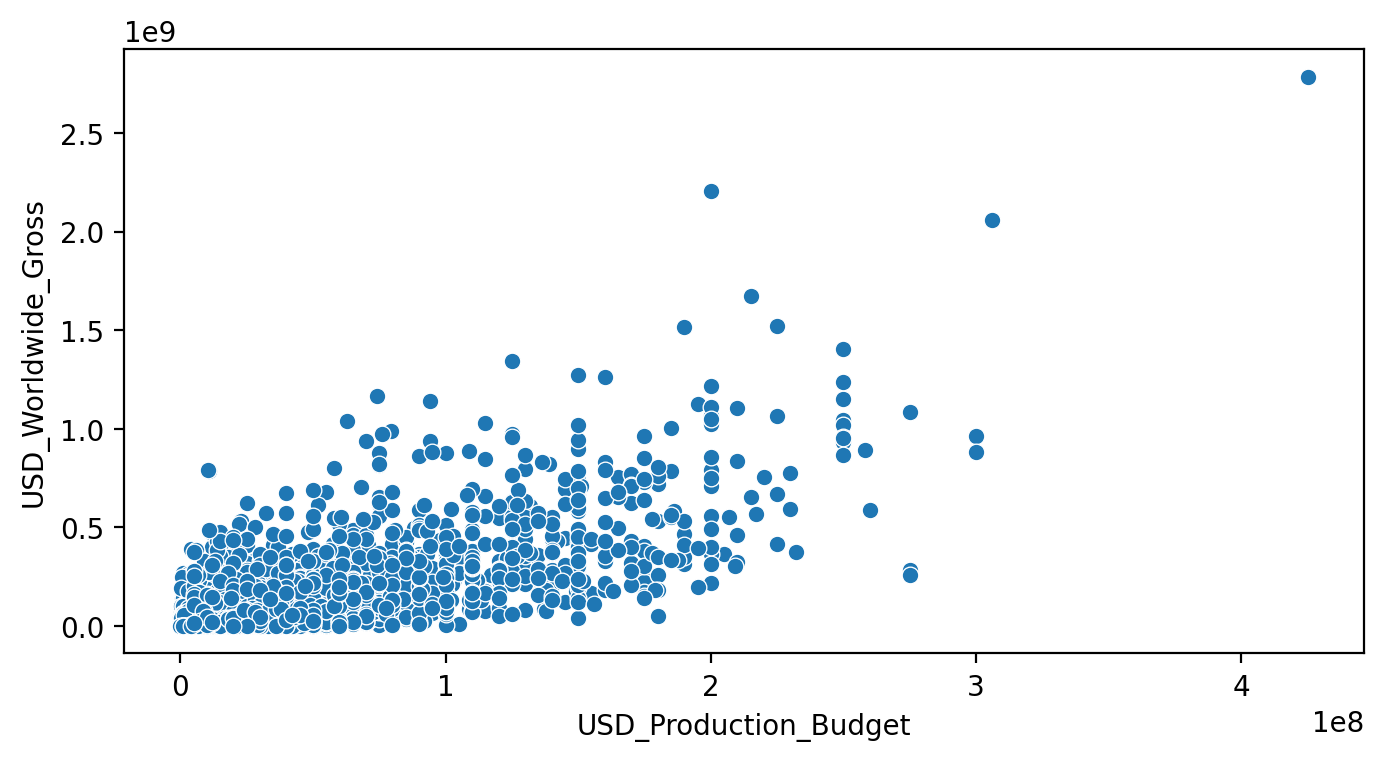

In [109]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')

plt.show()

`차트에 스타일 지정`

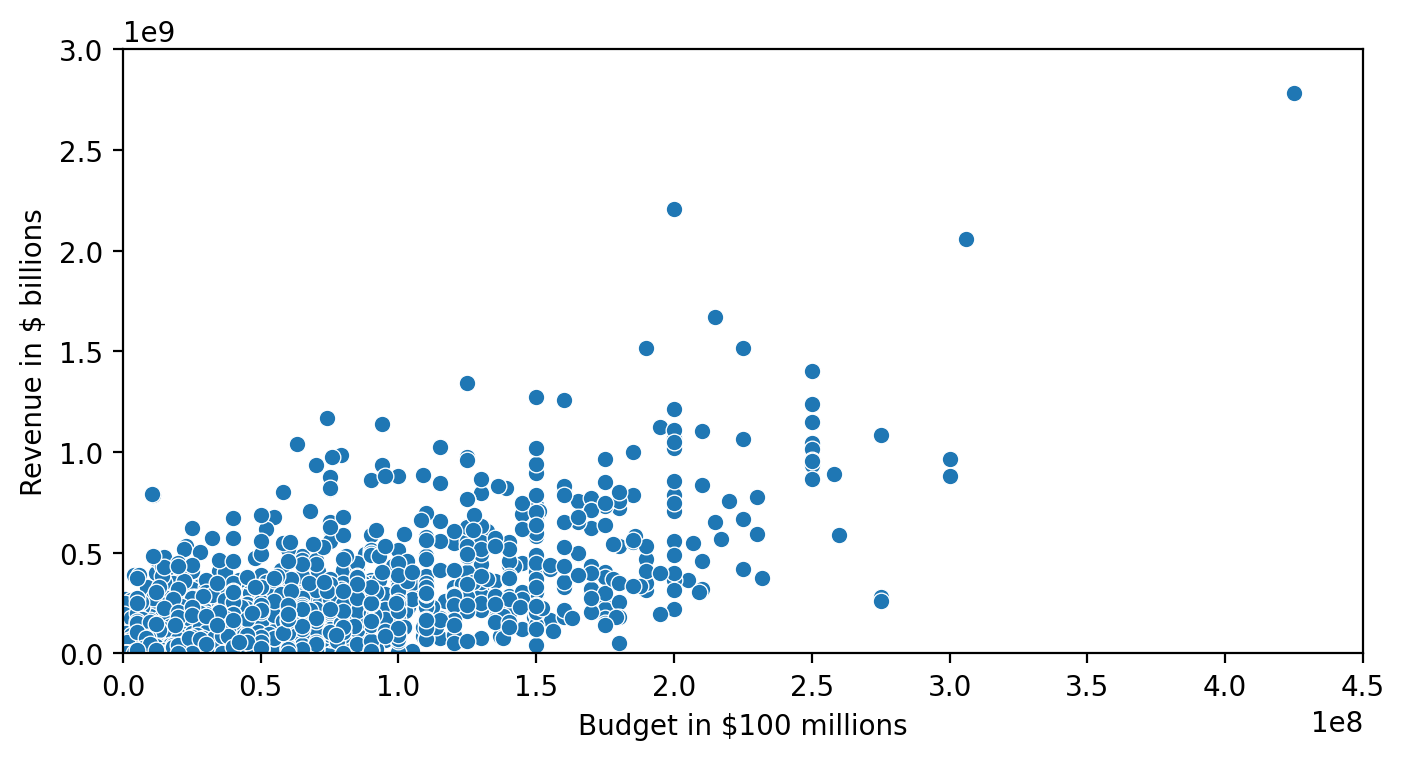

In [111]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

*거품 차트*

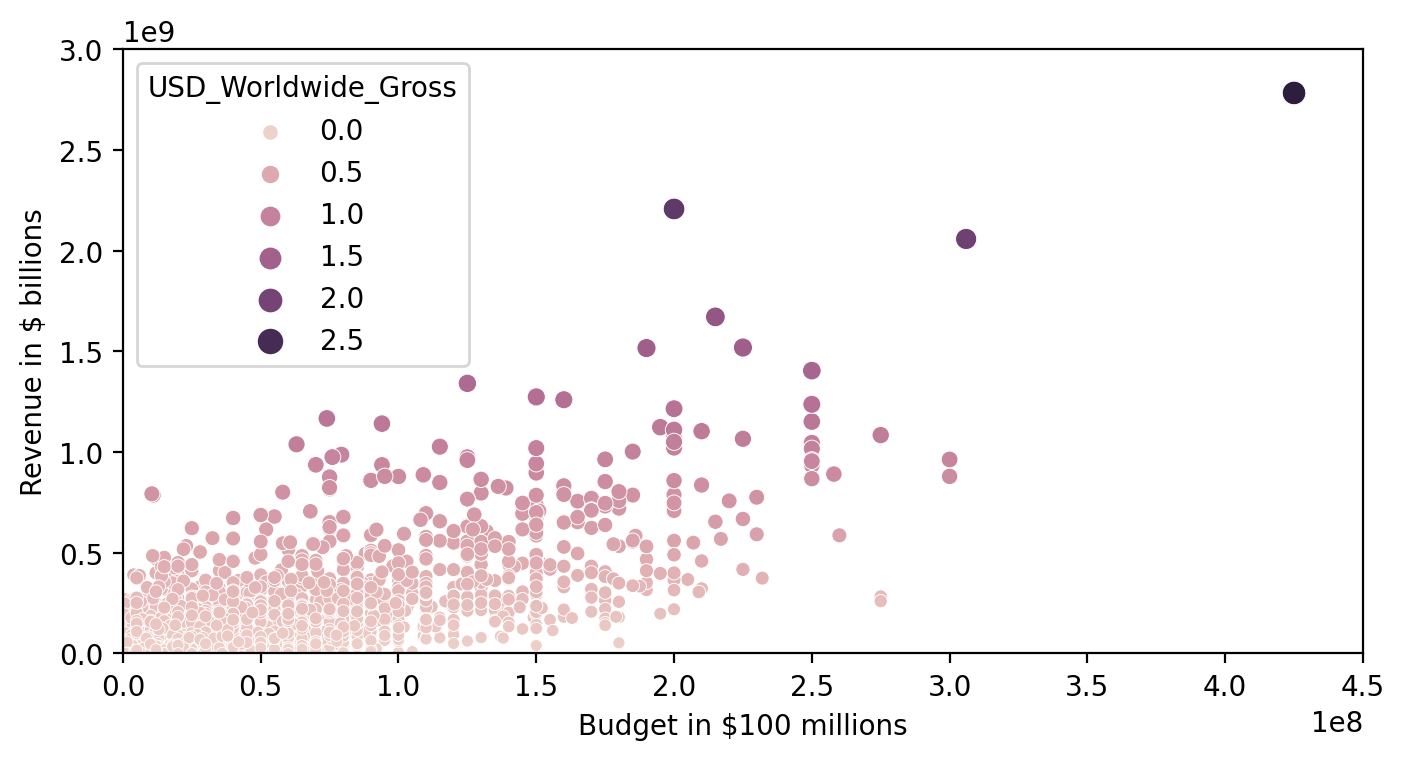

In [112]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

    - 고수익 영화들은 차트에서 좀 더 어두운 색을 가짐

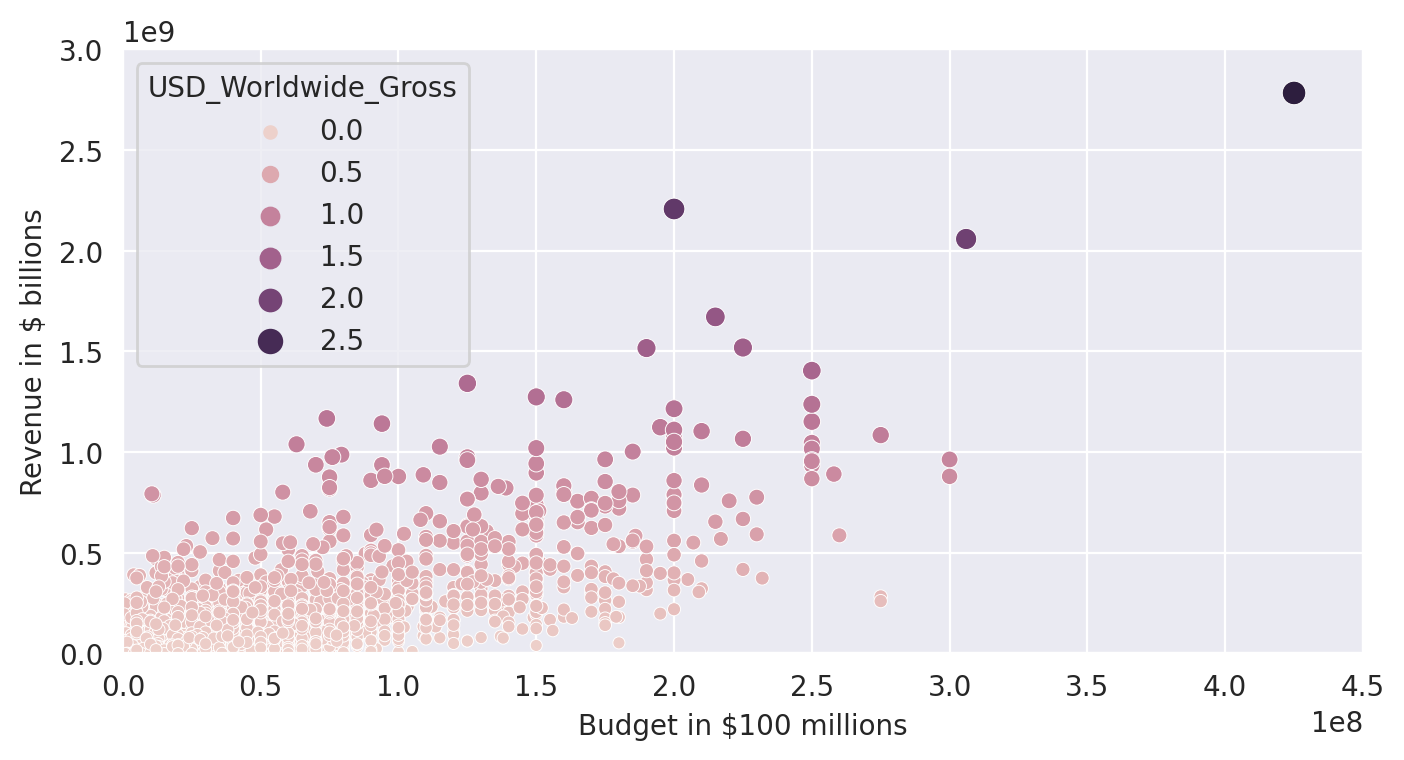

In [114]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
    ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

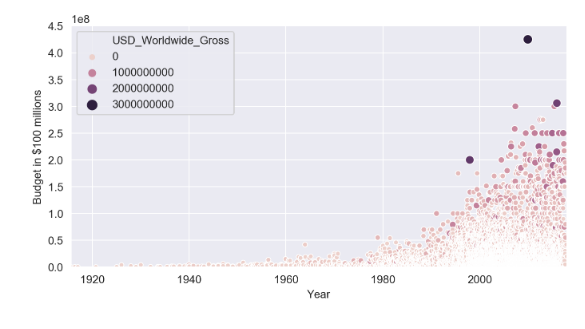

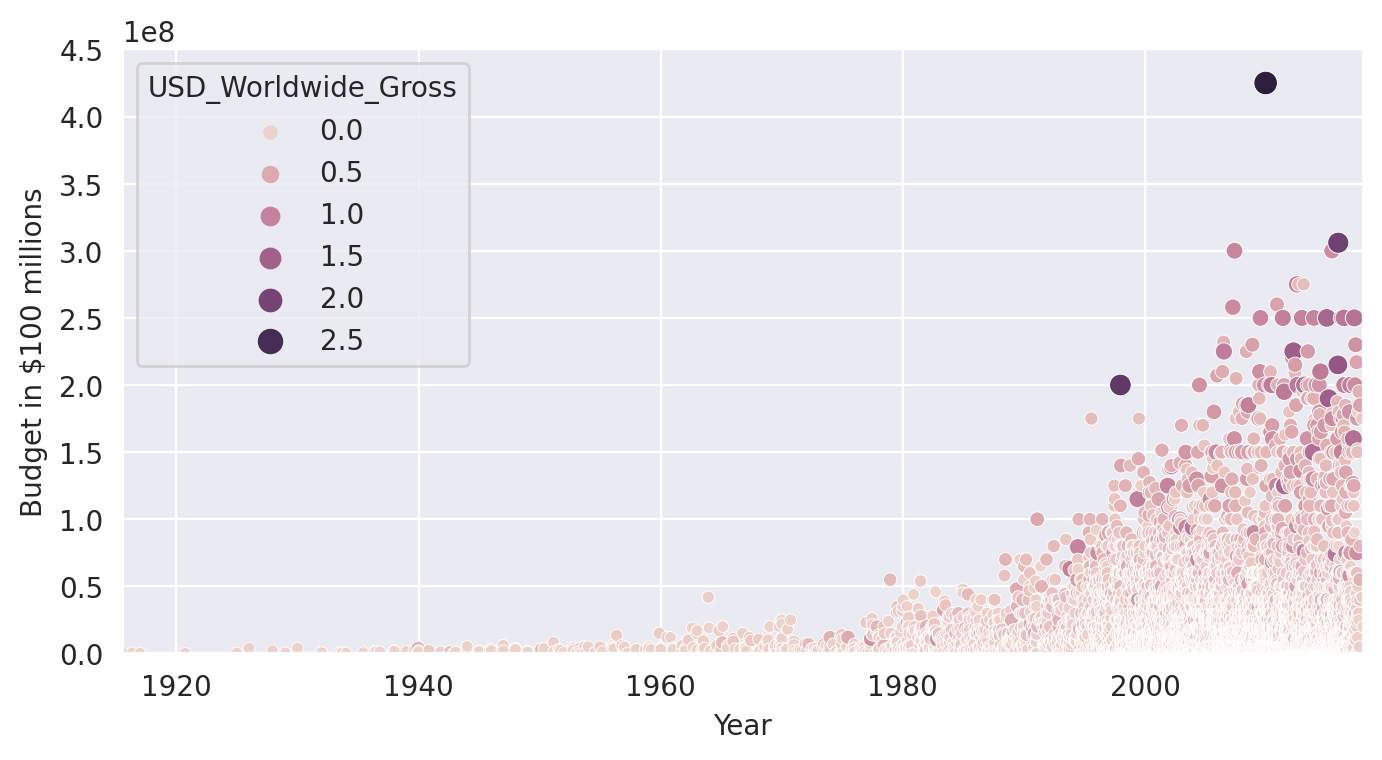

In [115]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

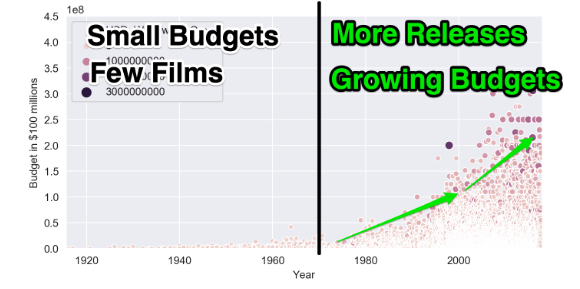

    - 영화예산은 지난 40년간 폭발적으로 증가함
    - 1980년대부터 2000년대까지 예산이 빠르게 증가함
    - 산업 전체가 훨씬 더 많은 영화를 만들면서 크게 증가함
    - 2000년대부터는 데이터의 수가 매우 조밀해서 중복하여 표시됨

## `651강`
정수 나눗셈: 연도를 10년 단위로 변환하는 트릭

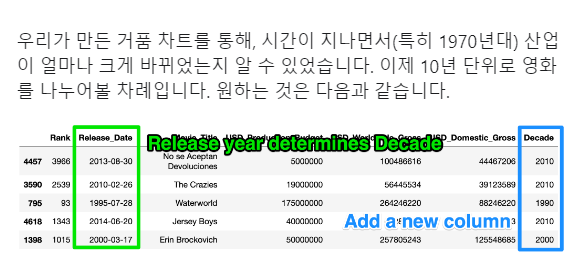

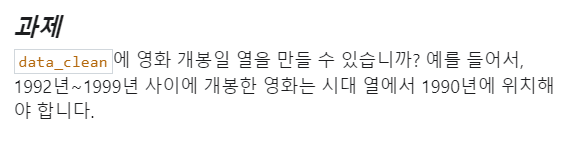

In [116]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [120]:
data_clean['Decade'] = data_clean['Release_Date'].apply(lambda x: str(x).split('-')[0])
data_clean.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915
1,5140,1916-05-09,Intolerance,385907,0,0,1916
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916


---
풀이

In [122]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
dt_index

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [125]:
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [126]:
decades = years//10 * 10
data_clean['Decades'] = decades
data_clean.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,1910


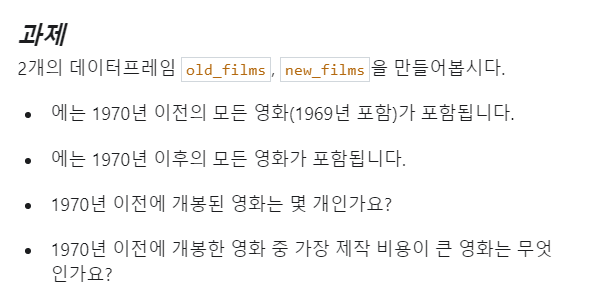

In [128]:
old_films = data_clean.query('Decades < 1970')
new_films = data_clean.query('Decades >= 1970')

In [129]:
old_films.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,1910


In [130]:
new_films.head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Decades
153,2159,1970-01-01,Waterloo,25000000,0,0,1970,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970,1970


In [132]:
print(old_films.shape)

(153, 8)


In [138]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


In [135]:
old_films.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1963,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1969,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1969,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1965,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1969,1960
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1969,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1942,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1968,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915,1910


In [137]:
old_films.sort_values(by='USD_Production_Budget', ascending=False).iloc[0]['Movie_Title']

'Cleopatra'

## `652강`
 씨본으로 선형 회귀 플롯 그리기

    - 선형 회귀 분석을 사용하여 영화별 예산과 전 세계 수익 관계 시각화

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

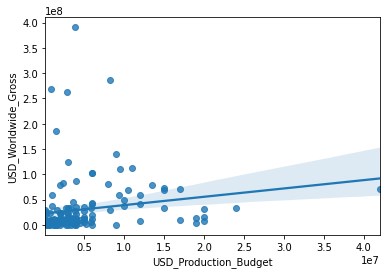

In [140]:
sns.regplot(data=old_films,
           x='USD_Production_Budget',
           y='USD_Worldwide_Gross')

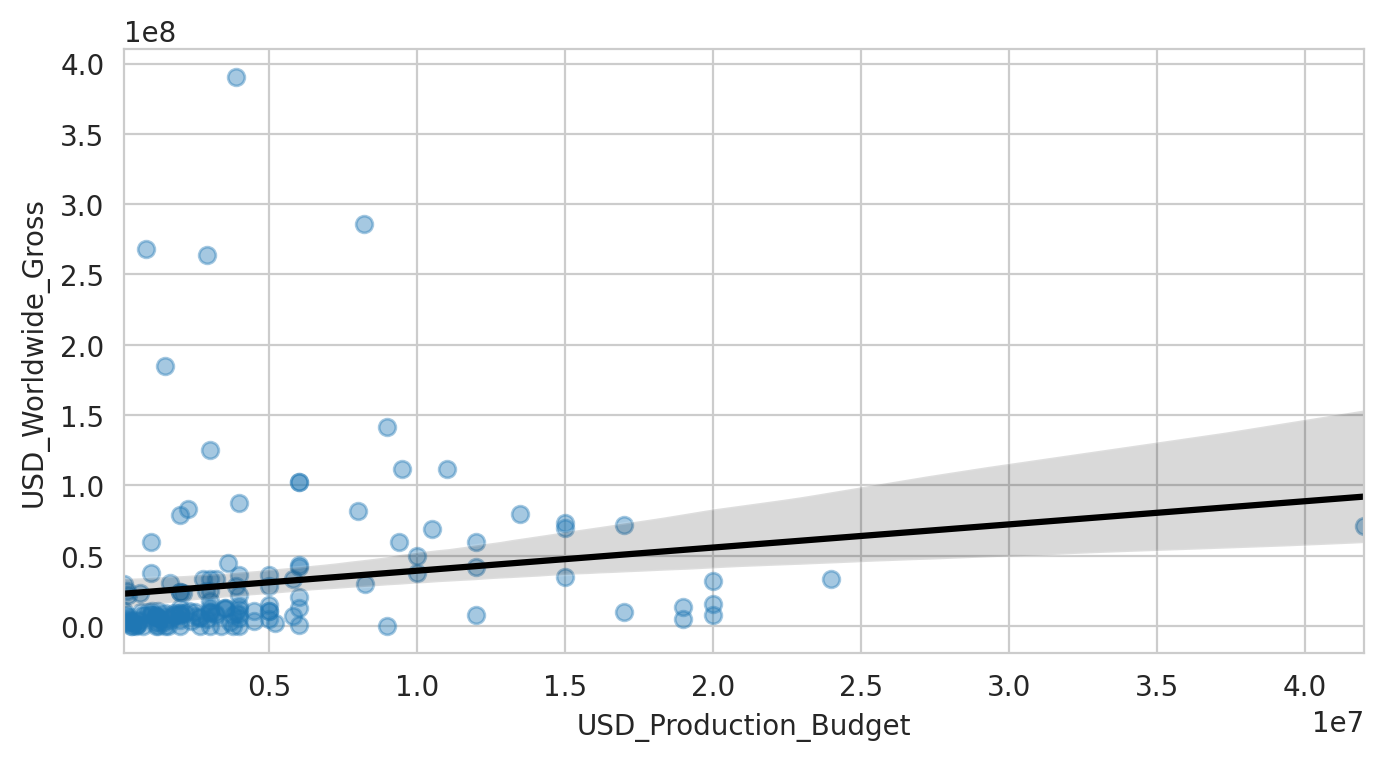

In [141]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

    - 가장 오른 편에 클레오파트라 영화
    - 저 예산 영화들이 상대적으로 훨씬 더 많은 수익을 올렸음
    - 제작 예산과 영화 수익간의 관계가 그렇게 큰 편은 아님
    - 왼쪽의 많은 점들이 선에서 많이 떨어져 있기 때문에, 예산과 수익간의 관계를 전혀 알 수 없을 것처럼 보인다

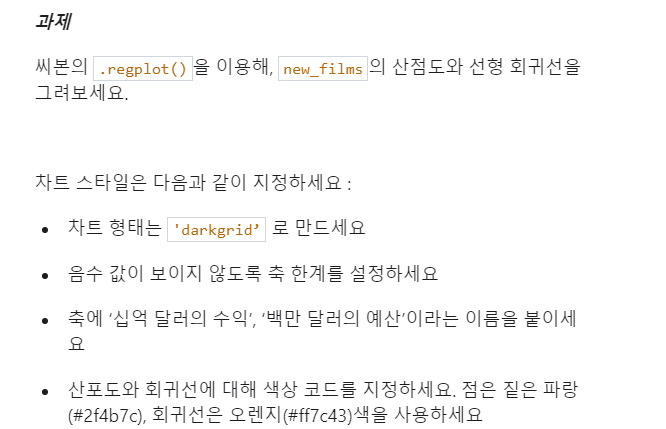

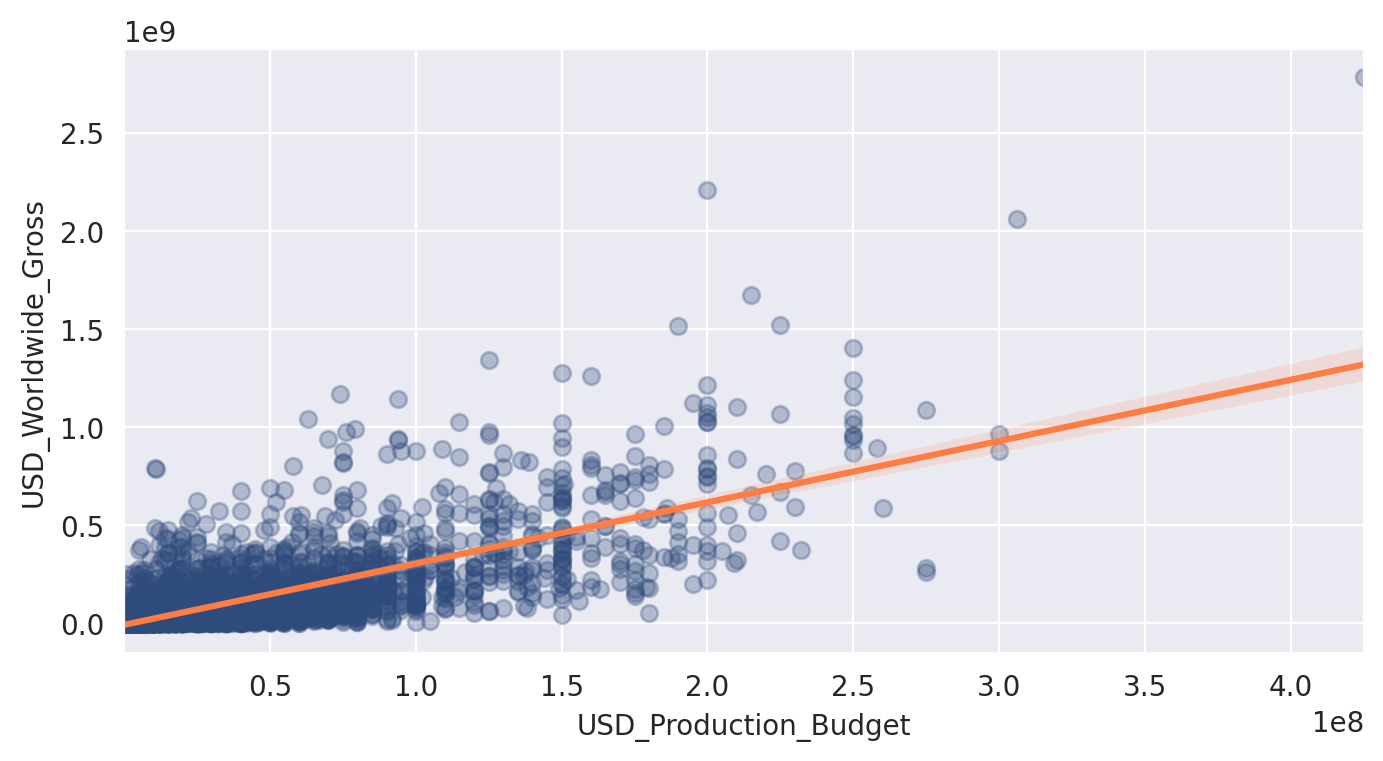

In [153]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.regplot(data = new_films,
           x='USD_Production_Budget',
           y='USD_Worldwide_Gross',
            color='#2f4b7c',
           scatter_kws = {'alpha': 0.3},
        line_kws = {'color': '#ff7c43'})
    
    ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

    - old_films 차트에 비하면 적합도가 높음
    - 시각적으로 데이터들이 위치한 점들이 많든 회귀선과 일치함
    - 신뢰구간도 좁은 편
    - 회귀선을 따른다면 1억 5천만 달러가 투입된 영화는 5억 달러에 조금 못 미치는 수익을 얻을 것
    
    - 전반적으로 영화 제작 예산과 그 영화의 전세계 시장 수익간에는 상당한 관계가 있다고 예측
    - 실제로 예산에 따른 수익 편차는?
    - 1달러의 예산추가로 기대되는 추가수익은?

## `653강`
사이킷런으로 자체 회귀 분석 실행하기

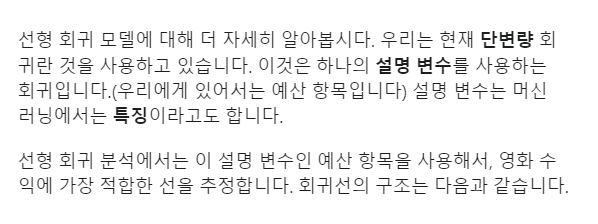

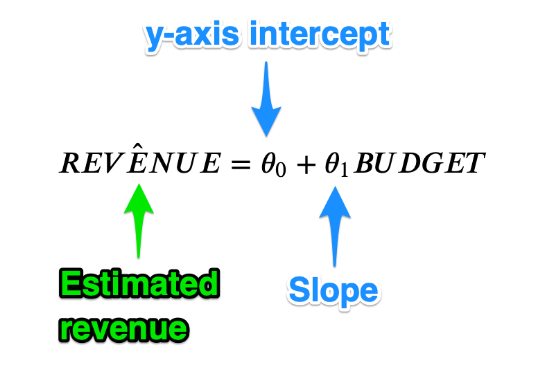

    - 최상의 선을 찾기 위해, 선형 회귀 분석에서는 y절편(Θ0)과 기울기(Θ1)를 측정
    - y절편은 예산이 0일 경우 영화 한 편이 얼마나 많은 수익을 올릴지를 말해줌
    - 기울기는 예산 1달러를 증액하여 얻을 수 있는 추가 수익을 말함

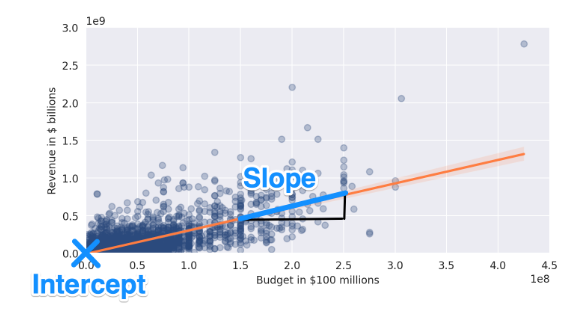

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
regression = LinearRegression()

In [158]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
X[:5]

,USD_Production_Budget
153,25000000
154,22000000
155,12000000
156,11000000
157,3500000


In [159]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
y[:5]

,USD_Worldwide_Gross
153,0
154,5000000
155,62500000
156,2200000
157,81600000


In [160]:
regression.fit(X,y)

LinearRegression()

In [161]:
print(regression.intercept_)

[-8650768.00661038]


In [162]:
regression.coef_

array([[3.12259592]])

    - 영화 예산이 0달러라면, 예상되는 수익은 -865만 달러
    - 기울기는 예산이 1달러 추가 될 때마다 영화 수익이 3.1달러씩 증가
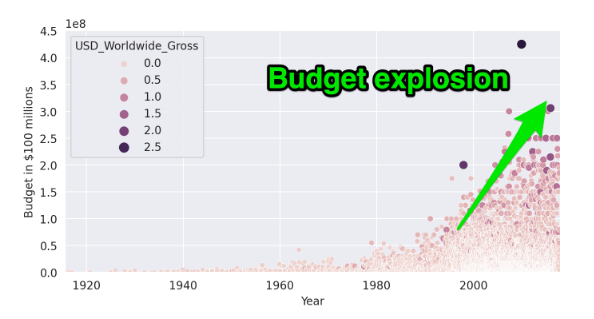

*R제곱 : 적합도*

- 만든 모형이 얼마나 적합한가?

In [163]:
regression.score(X,y)

0.5577032617720403

    - R^2 값이 약 0.558
    - 우리의 모델이 영화 수익 변동치의 약 56%를 설명한다는 것을 의미
    - 현실은 많이 복잡하기 때문에 실제 일어나는 일의 약 50%를 설명할 수 있는 단순 모델을 만든 것은 괜찮은 모델임

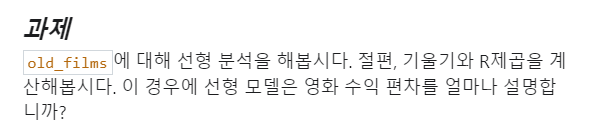

In [170]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
print(X)
print(y)

     USD_Production_Budget
0                   110000
1                   385907
2                   200000
3                   100000
4                   245000
..                     ...
148               20000000
149                6000000
150               24000000
151                8000000
152                4000000

[153 rows x 1 columns]
     USD_Worldwide_Gross
0               11000000
1                      0
2                8000000
3                3000000
4               22000000
..                   ...
148             31678778
149            102308900
150             33208099
151             82000000
152              6000000

[153 rows x 1 columns]


In [171]:
lg = LinearRegression()
lg.fit(X,y)

LinearRegression()

In [172]:
lg.coef_

array([[1.64771314]])

In [173]:
lg.intercept_

array([22821538.63508039])

In [174]:
lg.score(X,y)

0.02937258620576877

    - 1970년 이전의 영화에서는 예산과 수익간의 관계는 좋아 기울기가 1.6이나, R^2 낮음
    
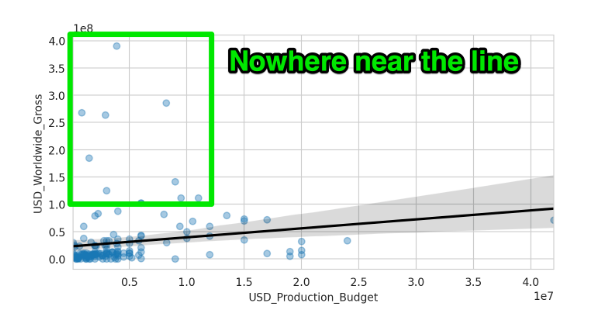

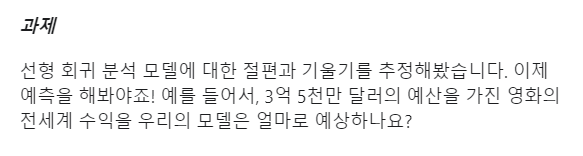

In [190]:
budget = 350000000

estimate = lg.intercept_[0] + lg.coef_[0,0]*budget
print(estimate)
estimate = round(estimate)

599521139.0388364


## `654강`
핵심 학습내용 및 요약

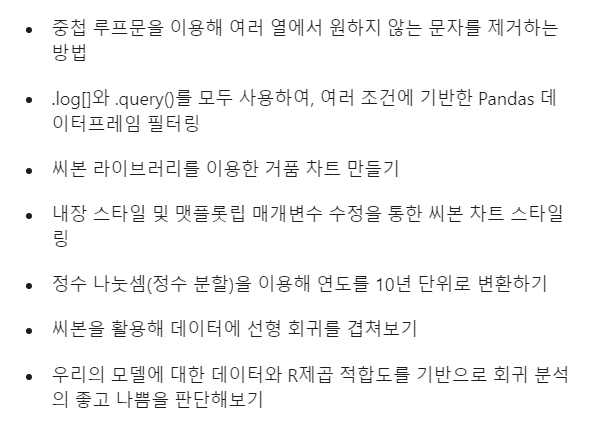
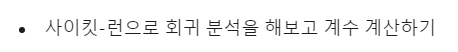